# Import necessary libraries

In [2]:
import pytesseract as tess
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Import the image

In [3]:
img = cv2.imread("orange.jpg")

The following mini-section is OPTIONAL: it works as a checker to make sure what's the image looks like in this step, without bothering to open a external window.

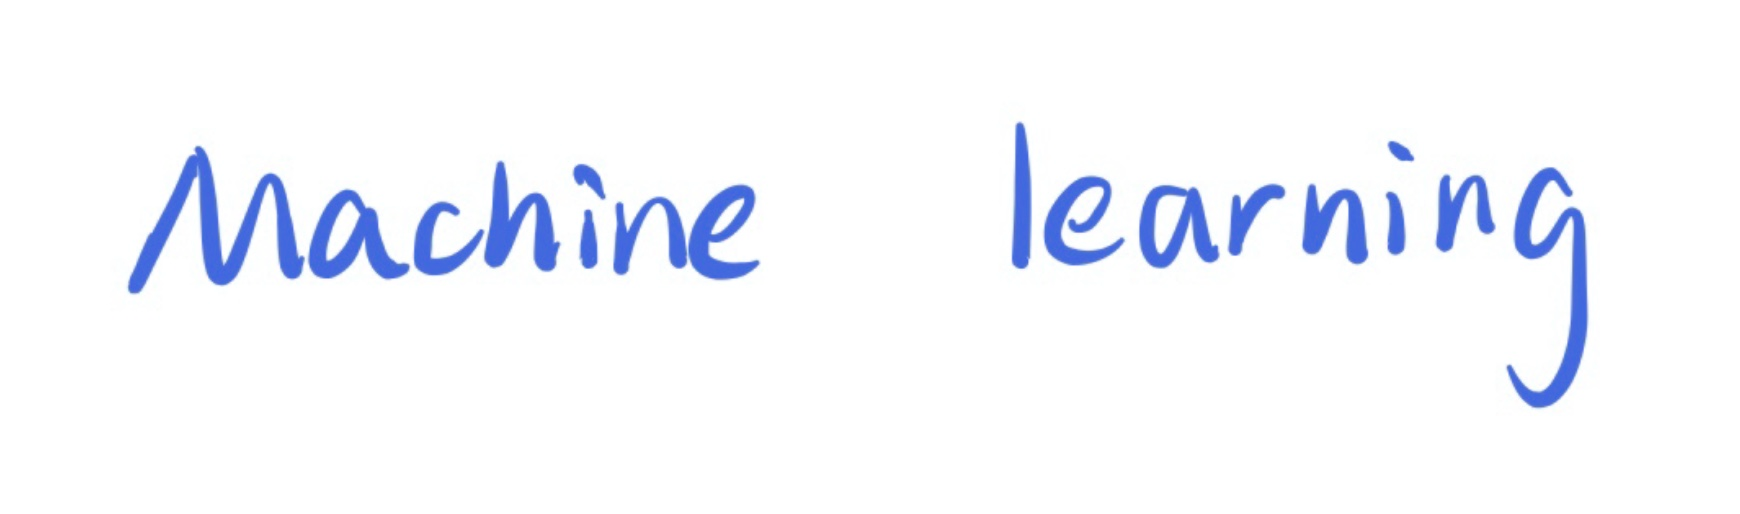

In [4]:
image = Image.fromarray(img, "RGB")
display(image)

# Filtering & Thresholding the image many times

In [5]:
bwimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
text = tess.image_to_string(bwimg)
print(text)

Nachine learn ng



In [6]:
_, th1 = cv2.threshold(bwimg, 150, 255, cv2.THRESH_BINARY)
text_1 = tess.image_to_string(th1)
print(text_1)

Machine learning



In [7]:
result = cv2.GaussianBlur(th1, (5,5), 0)
data = tess.image_to_string(result, lang='eng',config='--psm 6')
print(data)

Machine learning



# Use autocorrect to correct misspelling

Those mistakes are generated from the gap between hand-written and its recognition, though it is less possible to fix some misspelling.

In [8]:
from autocorrect import Speller
 
check = Speller(lang='en')

result = check(data)
print(result)

Machine learning



# Export to a new txt file

In [9]:
outF = open("output.txt", "w")
for line in result:
  outF.write(line)
outF.close()
